In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
import scipy.stats as ss
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import statsmodels.stats.api as sm

In [14]:
shgl = pd.read_csv('A+&+B+shingles.csv')

In [15]:
shgl.isnull().sum()

A    0
B    5
dtype: int64

In [16]:
shgl.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


# 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

Null hypothesis (H0) : mean moisture content <= 0.35

Alternative hypothesis (H1) : mean moisture content > 0.35

We will consider alpha as 0.05

𝜇 equals to 0.35.

Below we will find individual P-Value for both A and B shingles using one sample t-test

## One Sample T-Test for A Shingles

In [17]:
df_A = pd.read_csv('A+shingles.csv')
df_A.head()

,A
0,0.44
1,0.61
2,0.47
3,0.30
4,0.15


In [18]:
t_statistic, p_value = ttest_1samp(df_A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-1.47350463] p value: [0.14955266] 


In [19]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= [0.14955266]


In this example, p value is 0.14955266 and it is greater than 5% level of significance

So the statistical decision is failing to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is  sufficient evidence  to prove that mean moisture contents in A types of shingles are within the permissible limits of 0.35

## One Sample T-Test for B Shingles

In [20]:
df_B = pd.read_csv('B+shingles.csv')
df_B.head()

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37


In [21]:
t_statistic, p_value = ttest_1samp(df_B, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-3.10033131] p value: [0.00418095] 


In [22]:
alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= [0.00418095]


In this example, p value is 0.00418095 and it is lesser than 5% level of significance

So the statistical decision is to reject the null hypothesis at 5% level of significance.

### So at 95% confidence level, there is sufficient evidence  to prove that mean moisture contents in B types of shingles is not within the permissible limits of 0.35

# 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Here we have to assume that the data values are continuous, the variance is equal and are normally distributed to conduct the t test. 

The null and alternative hypothesis formed are:

𝐻0 : 𝜇𝐴 - 𝜇𝐵 ≠ 0 i.e 𝜇𝐴 ≠ 𝜇𝐵

𝐻𝐴: 𝜇𝐴 - 𝜇𝐵 = 0 i.e 𝜇𝐴 = 𝜇𝐵

Here we select $\alpha$ = 0.05 and the population standard deviation is not known.

We also have two samples and we do not know the population standard deviation.
The sample is large sample, n > 30. So we use the t distribution and the  𝑡𝑆𝑇𝐴𝑇  test statistic for two sample unpaired test which can be see used below

In [23]:
t_statistic, p_value  = ttest_ind(shgl['A'],shgl['B'], nan_policy = 'omit')
print('tstat',t_statistic)    
print('P Value',p_value) 

tstat 1.2896282719661123
P Value 0.2017496571835306


In [24]:
print ("Two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the population means for shingles A and B are equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that population means for shingles A and B are not equal.')

Two-sample t-test p-value= 0.2017496571835306
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that population means for shingles A and B are not equal.


We have also cross checked the p-value and test statistic values using the below function in excel 

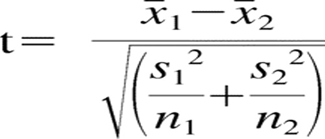